In [9]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
results_folder = "./output/results"

In [5]:
data_info = {}
result_files = os.listdir(results_folder)
for filename in result_files:
    with open(f'output/results/{filename}', 'r') as f:
        data = json.load(f)
        data_info[filename.split(".")[0]] = data

In [7]:
def eda(data:pd.DataFrame):
    # Create a dataframe for easier manipulation
    df = pd.DataFrame([data])

    # Basic analysis
    print("Basic Metrics:")
    print(f"Dataset: {data['dataset']}")
    print(f"Prediction Model: {data['predictions_model']}")
    print(f"Explanation Model: {data['explanations_model']}")
    print(f"Total samples: {data['total_predictions']}")
    print("\nPerformance Metrics:")
    print(f"Prediction accuracy: {data['prediction_accuracy']:.2%}")
    print(f"Valid choice ratio: {data['valid_choice_predictions'] / data['total_predictions']:.2%}")
    print(f"Explanation accuracy: {data['explanations_accuracy']:.2%}")
    print(f"Average explanation confidence: {data['average_explanation_confidence']:.2%}")
    print("\nExecution Metrics:")
    print(f"Prediction execution time: {data['predictions_execution_time']:.2f} seconds")
    print(f"Explanation execution time: {data['explanations_execution_time']:.2f} seconds")
    print(f"Prediction cost: ${data['predictions_total_cost']:.4f}")
    print(f"Explanation cost: ${data['explanations_total_cost']:.4f}")
    print(f"Total cost: ${data['predictions_total_cost'] + data['explanations_total_cost']:.4f}")

    # Set style for visualizations
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 10))

    # 1. Accuracy comparison
    plt.subplot(2, 2, 1)
    accuracies = [data['prediction_accuracy'],
                  data['valid_choice_predictions'] / data['total_predictions'],
                  data['explanations_accuracy']]
    labels = ['Prediction\nAccuracy', 'Valid Choice\nRatio', 'Explanation\nAccuracy']
    sns.barplot(x=labels, y=accuracies, palette='viridis')
    plt.ylim(0, 1)
    plt.title('Accuracy Metrics')
    plt.ylabel('Accuracy')
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.02, f'{v:.2%}', ha='center')

    # 2. Correct vs Incorrect counts
    plt.subplot(2, 2, 2)
    categories = ['Predictions', 'Explanations']
    correct = [data['correct_predictions'], data['correct_explanations']]
    incorrect = [data['total_predictions'] - data['correct_predictions'],
                 data['total_explanations'] - data['correct_explanations']]

    x = np.arange(len(categories))
    width = 0.35

    plt.bar(x - width/2, correct, width, label='Correct', color='seagreen')
    plt.bar(x + width/2, incorrect, width, label='Incorrect', color='indianred')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Correct vs Incorrect Counts')
    plt.xticks(x, categories)
    plt.legend()
    for i, v in enumerate(correct):
        plt.text(i - width/2, v + 0.5, str(v), ha='center')
    for i, v in enumerate(incorrect):
        plt.text(i + width/2, v + 0.5, str(v), ha='center')

    # 3. Execution time
    plt.subplot(2, 2, 3)
    times = [data['predictions_execution_time'], data['explanations_execution_time']]
    labels = ['Prediction Time', 'Explanation Time']
    sns.barplot(x=labels, y=times, palette='cool')
    plt.title('Execution Time (seconds)')
    plt.ylabel('Time (seconds)')
    for i, v in enumerate(times):
        plt.text(i, v + 0.5, f'{v:.2f}s', ha='center')

    # 4. Cost analysis
    plt.subplot(2, 2, 4)
    costs = [data['predictions_total_cost'], data['explanations_total_cost']]
    labels = ['Prediction Cost', 'Explanation Cost']
    sns.barplot(x=labels, y=costs, palette='YlOrRd')
    plt.title('Cost Analysis (USD)')
    plt.ylabel('Cost ($)')
    for i, v in enumerate(costs):
        plt.text(i, v + 0.0002, f'${v:.4f}', ha='center')

    # 5. Cost per sample
    plt.figure(figsize=(10, 6))
    cost_per_prediction = data['predictions_total_cost'] / data['total_predictions']
    cost_per_explanation = data['explanations_total_cost'] / data['total_explanations']
    costs_per_sample = [cost_per_prediction, cost_per_explanation]
    labels = ['Cost per Prediction', 'Cost per Explanation']
    sns.barplot(x=labels, y=costs_per_sample, palette='plasma')
    plt.title('Cost per Sample (USD)')
    plt.ylabel('Cost per Sample ($)')
    for i, v in enumerate(costs_per_sample):
        plt.text(i, v + 0.00001, f'${v:.6f}', ha='center')

    # 6. Confidence vs Accuracy for explanations
    plt.figure(figsize=(8, 6))
    confidence = data['average_explanation_confidence']
    accuracy = data['explanations_accuracy']
    plt.bar(['Confidence', 'Accuracy'], [confidence, accuracy], color=['skyblue', 'orange'])
    plt.ylim(0, 1)
    plt.title('Explanation Confidence vs Accuracy')
    plt.text(0, confidence + 0.02, f'{confidence:.2%}', ha='center')
    plt.text(1, accuracy + 0.02, f'{accuracy:.2%}', ha='center')

    # Show all plots
    plt.tight_layout()
    plt.show()

Basic Metrics:
Dataset: code
Prediction Model: gpt-4o-mini
Explanation Model: gpt-4o-mini
Total samples: 100

Performance Metrics:
Prediction accuracy: 82.00%
Valid choice ratio: 100.00%
Explanation accuracy: 49.00%
Average explanation confidence: 85.55%

Execution Metrics:
Prediction execution time: 31.47 seconds
Explanation execution time: 33.09 seconds
Prediction cost: $0.0109
Explanation cost: $0.0058
Total cost: $0.0167


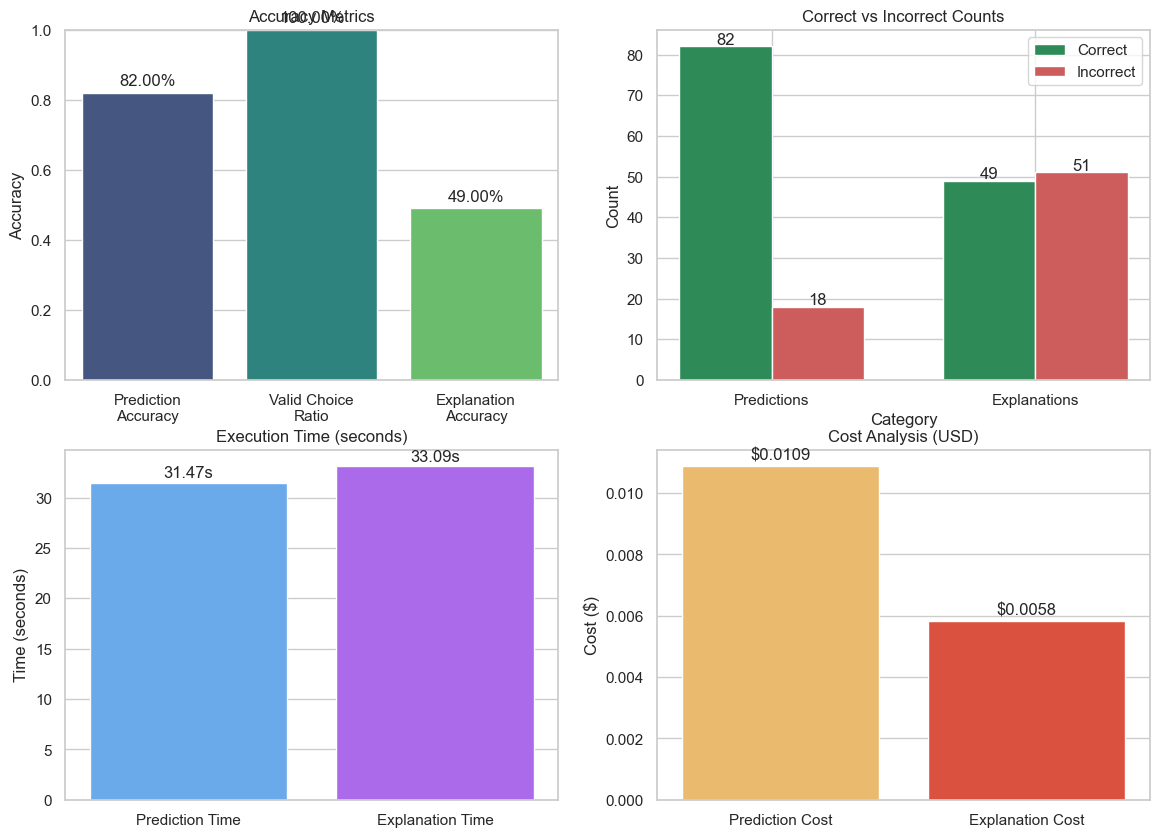

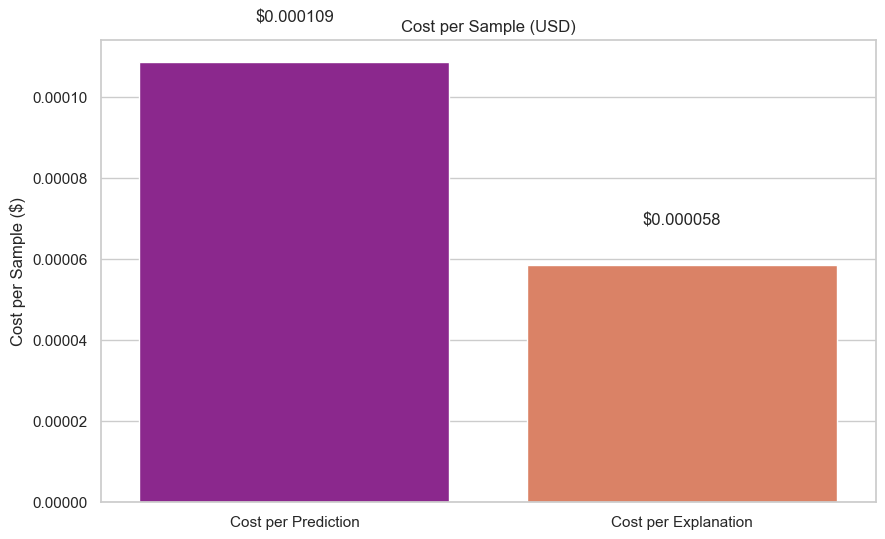

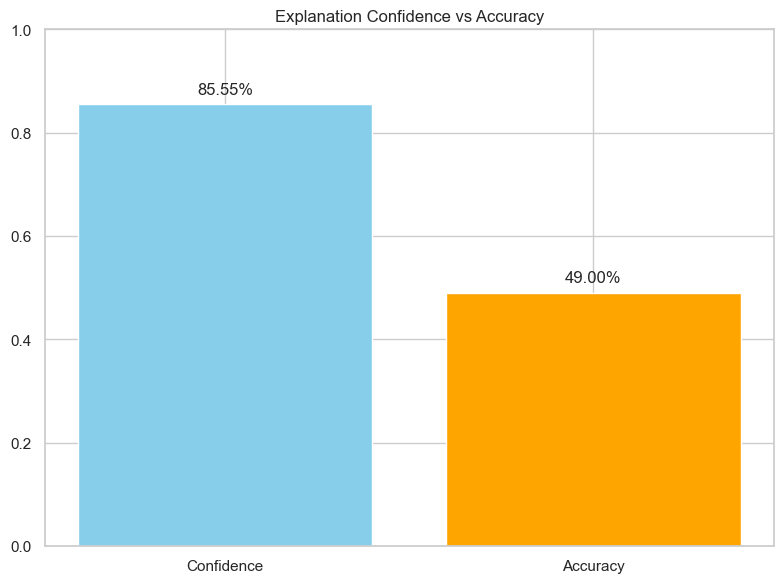

Basic Metrics:
Dataset: e
Prediction Model: gpt-4o-mini
Explanation Model: gpt-4o-mini
Total samples: 100

Performance Metrics:
Prediction accuracy: 88.00%
Valid choice ratio: 99.00%
Explanation accuracy: 5.00%
Average explanation confidence: 71.05%

Execution Metrics:
Prediction execution time: 31.39 seconds
Explanation execution time: 33.85 seconds
Prediction cost: $0.0200
Explanation cost: $0.0115
Total cost: $0.0315


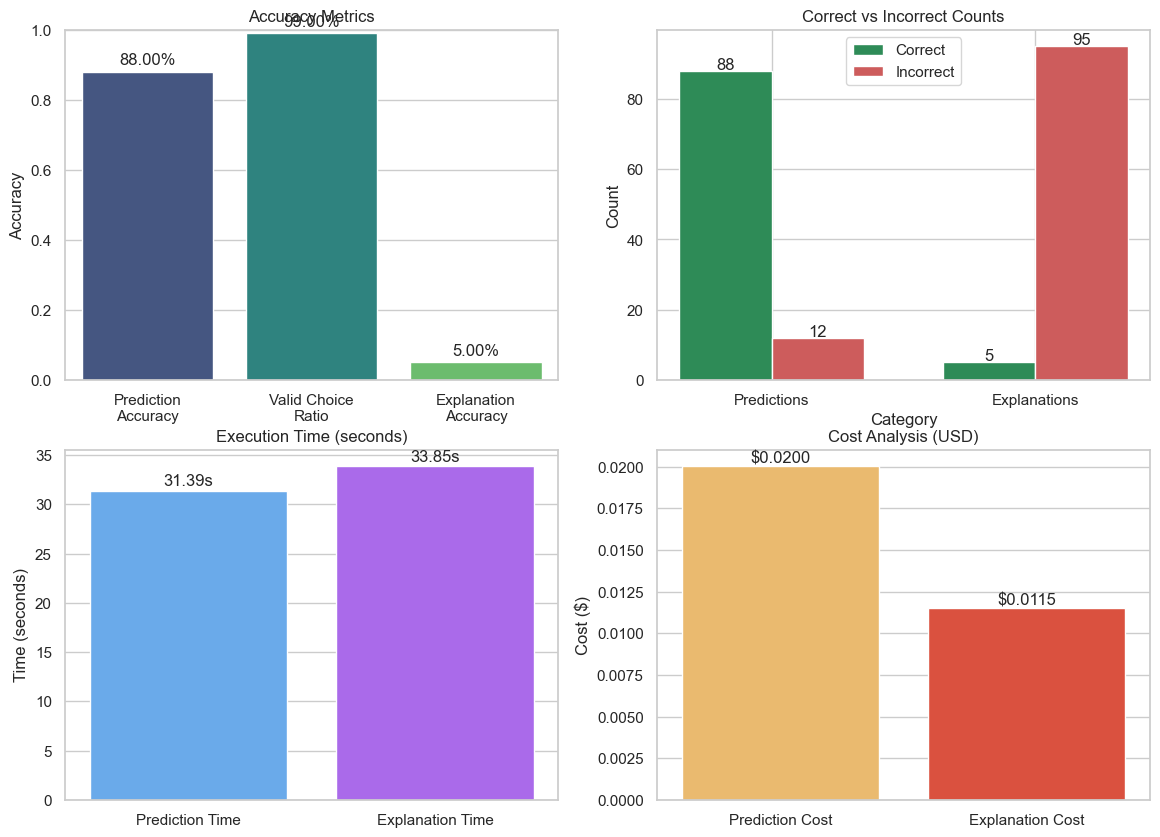

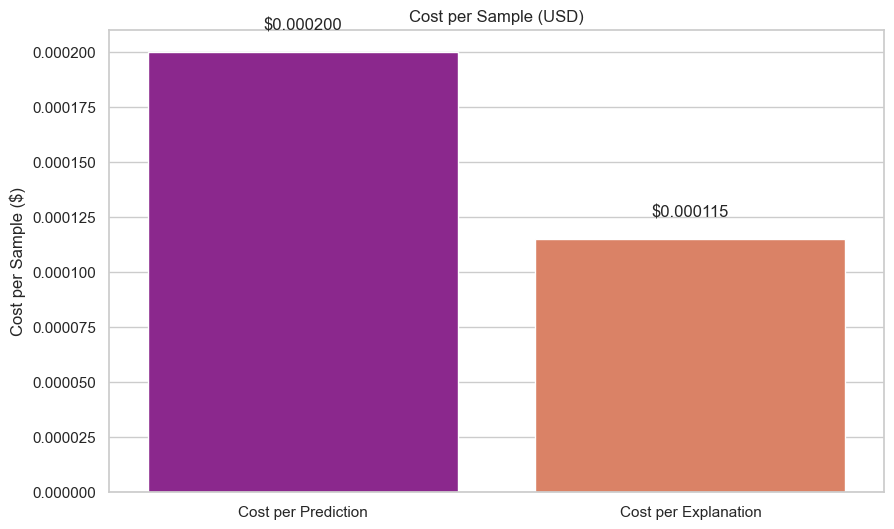

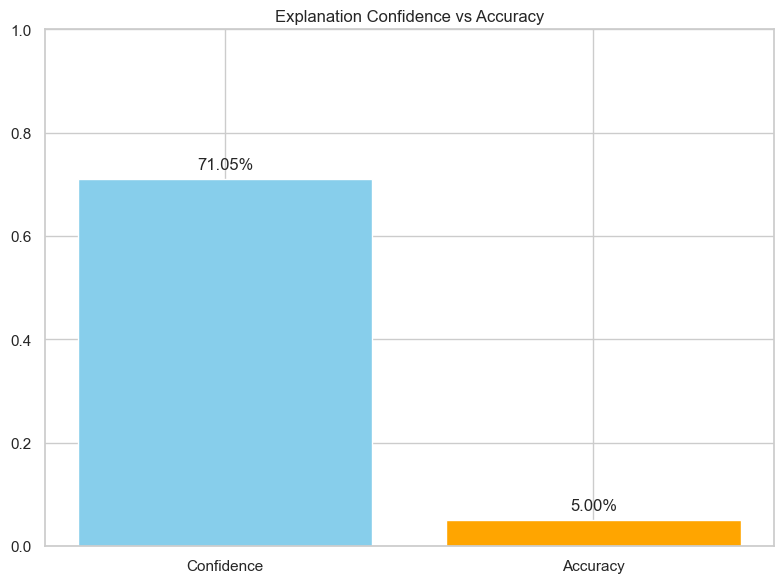

Basic Metrics:
Dataset: math
Prediction Model: gpt-4o-mini
Explanation Model: gpt-4o-mini
Total samples: 100

Performance Metrics:
Prediction accuracy: 70.00%
Valid choice ratio: 86.00%
Explanation accuracy: 49.00%
Average explanation confidence: 81.45%

Execution Metrics:
Prediction execution time: 31.63 seconds
Explanation execution time: 28.50 seconds
Prediction cost: $0.0113
Explanation cost: $0.0060
Total cost: $0.0173


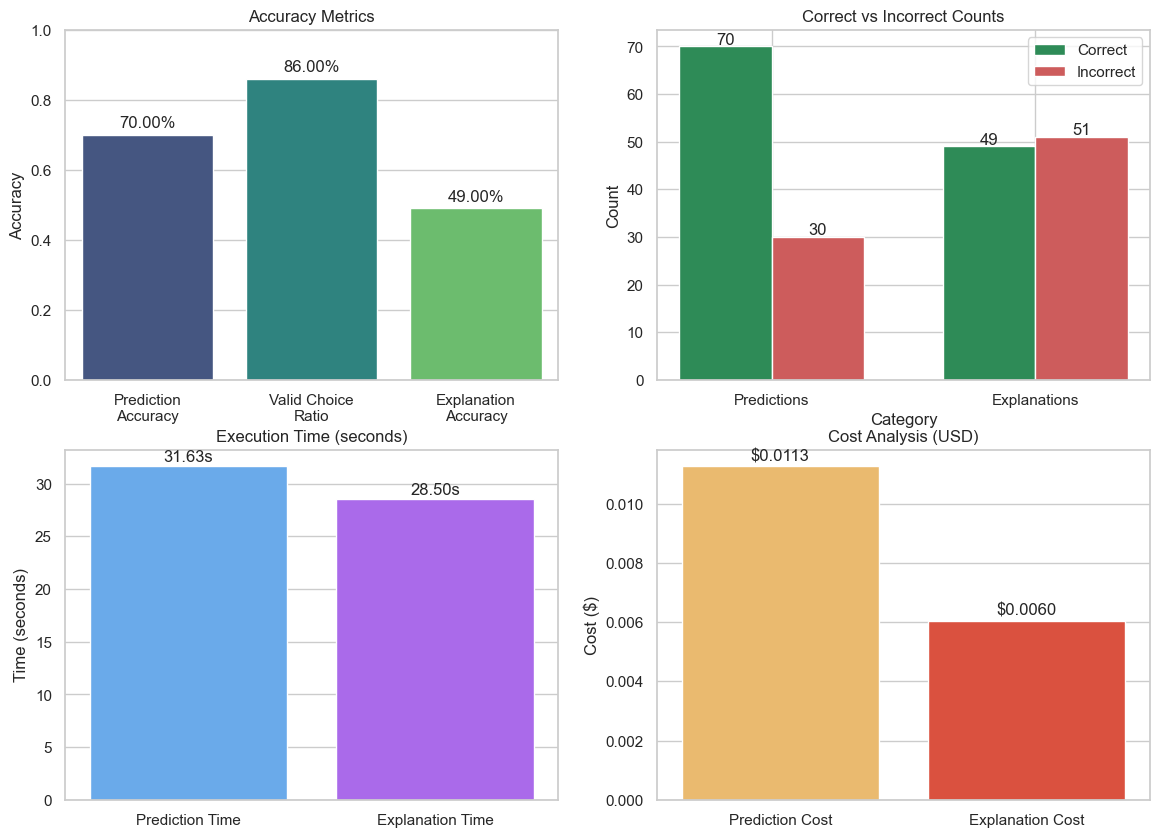

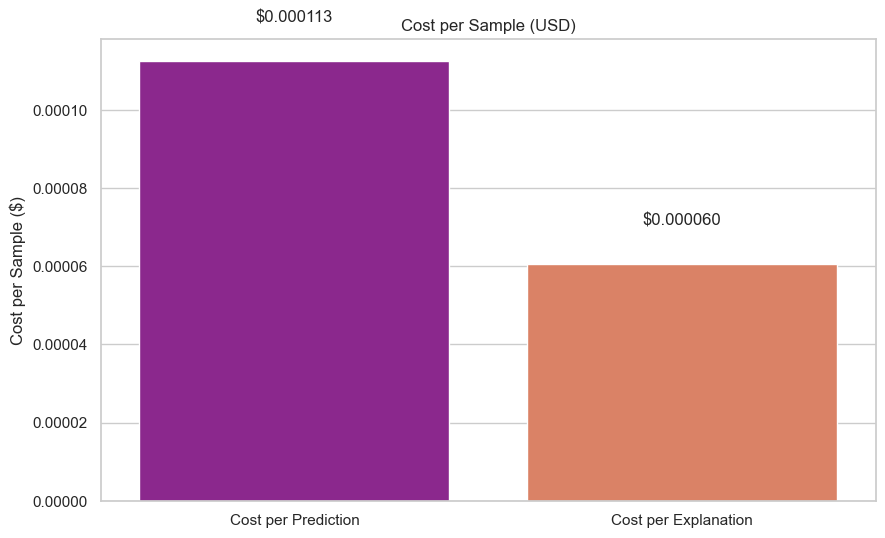

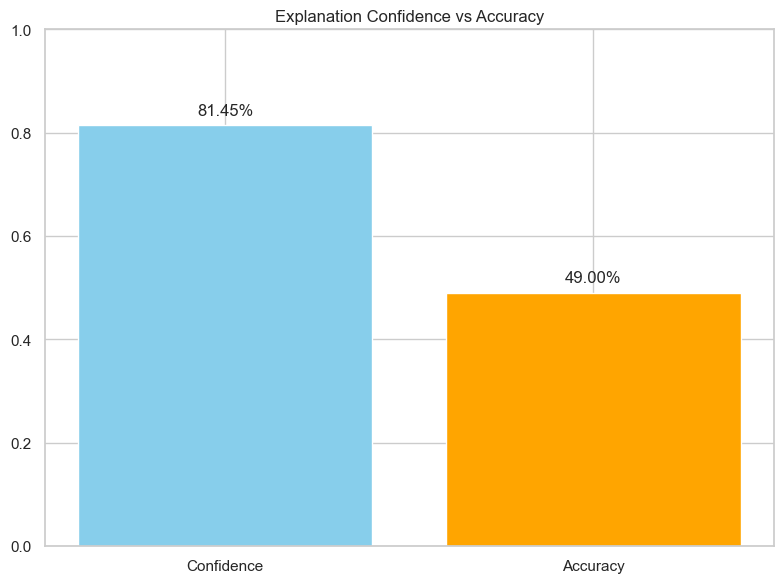

Basic Metrics:
Dataset: text
Prediction Model: gpt-4o-mini
Explanation Model: gpt-4o-mini
Total samples: 100

Performance Metrics:
Prediction accuracy: 70.00%
Valid choice ratio: 100.00%
Explanation accuracy: 32.00%
Average explanation confidence: 86.70%

Execution Metrics:
Prediction execution time: 33.58 seconds
Explanation execution time: 25.50 seconds
Prediction cost: $0.0419
Explanation cost: $0.0226
Total cost: $0.0646


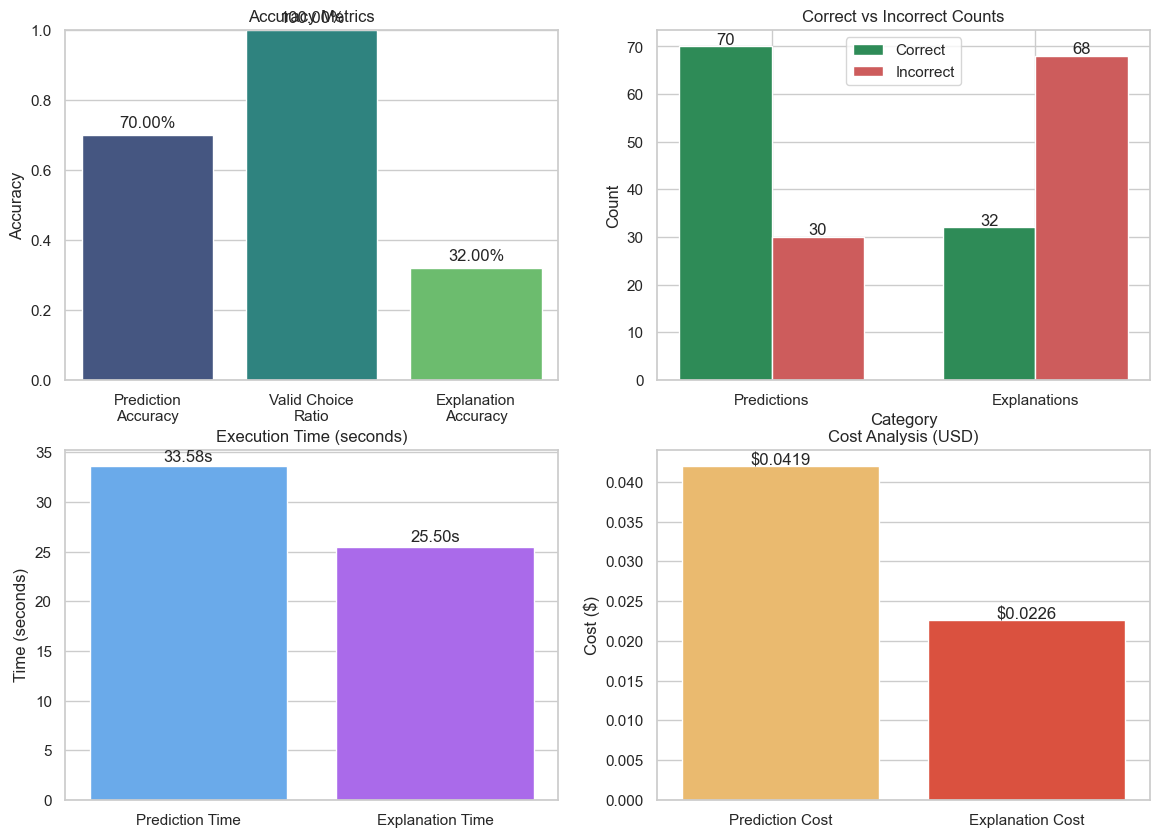

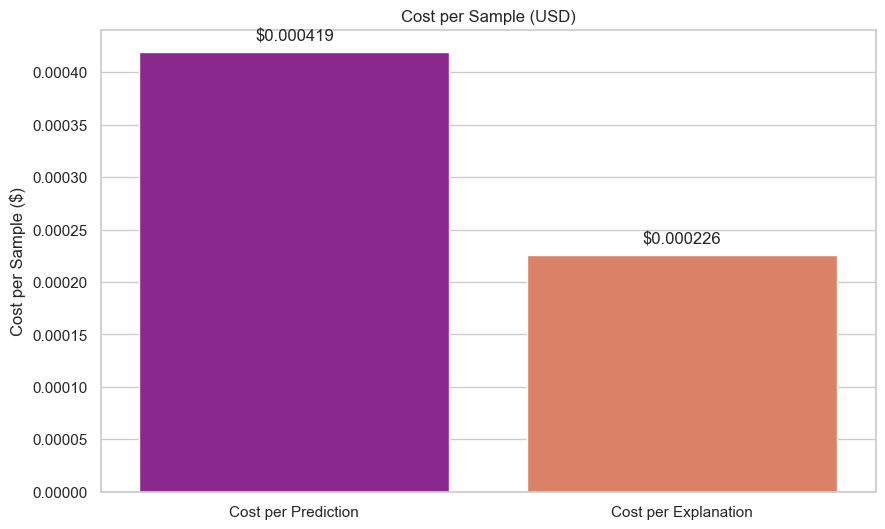

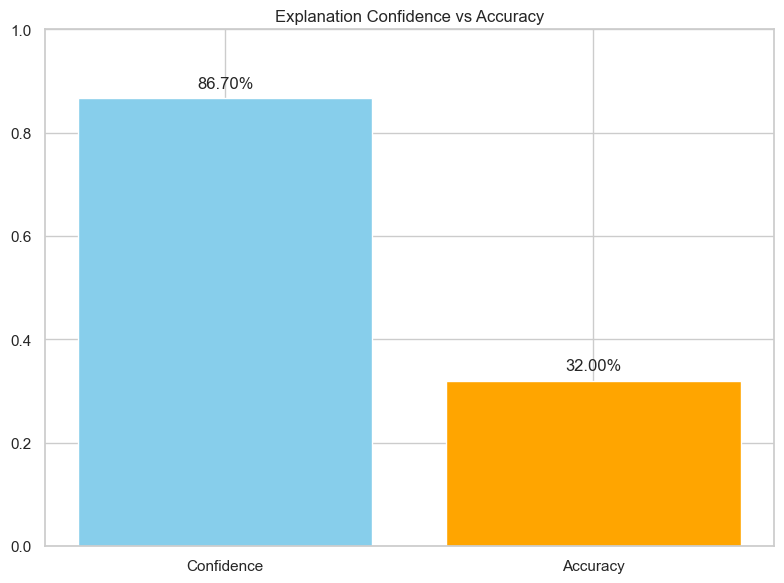

In [10]:
for dataset_name in data_info:
    eda(data_info[dataset_name])